In [ ]:
# install main library YFinance
!pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import time
from datetime import date


In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=19
Period for indexes: 1954-04-19 to 2024-04-19 


## 1. GDPC1


In [ ]:
# Real Potential Gross Domestic Product (GDPC1), QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [ ]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq
DATE,,,
2022-10-01,21989.981,0.006517,0.006517
2023-01-01,22112.329,0.017179,0.017179
2023-04-01,22225.350,0.023825,0.023825
2023-07-01,22490.692,0.029269,0.029269
2023-10-01,22679.255,0.031345,0.031345


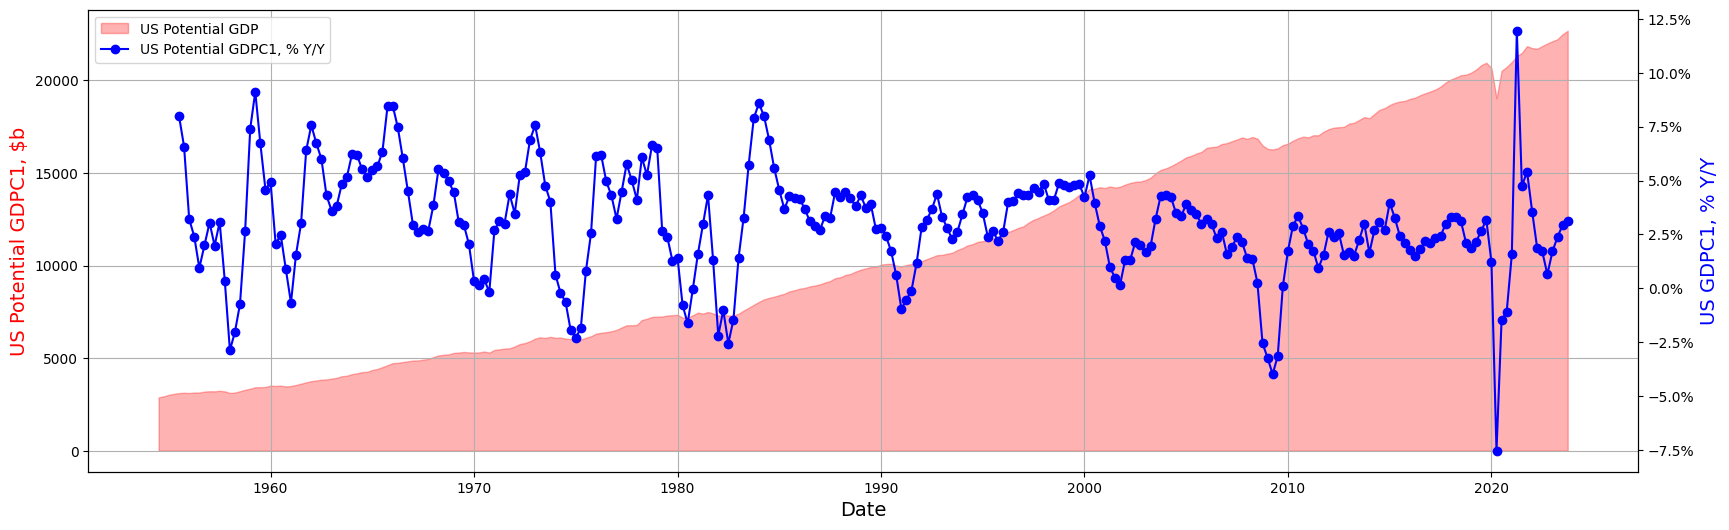

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

ax.fill_between(gdpc1.index, gdpc1.GDPC1, color="red", alpha=0.3, label="US Potential GDP")

ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_yoy, color="blue", marker="o", label="US Potential GDPC1, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDPC1, $b", color="red", fontsize=14)
ax2.set_ylabel("US GDPC1, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 2. Treasury Yield


In [ ]:
# https://fred.stlouisfed.org/series/DGS2
# https://fred.stlouisfed.org/series/DGS10

start = '2000-01-01'

dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [ ]:
# Joining Data
interest_rates = dgs10.join(dgs2, how='inner', lsuffix='_dgs10', rsuffix='_dgs2')

# Calculating Difference
interest_rates['diff'] = interest_rates['DGS10'] - interest_rates['DGS2']

# Finding Minimum
min_diff_since_2000 = interest_rates['diff'].min()

# Round to one Decimal
min_diff_since_2000 = round(min_diff_since_2000, 1)

print("Minimum value of (dgs10 - dgs2) since 2000:", min_diff_since_2000)

Minimum value of (dgs10 - dgs2) since 2000: -1.1


In [ ]:
# An "inverted yield curve" occurs when long-term bond yields are lower than short-term bond yields.
# Normally, it's the opposite, as investors expect higher returns for long-term investments.
# An inverted yield curve is often considered a precursor to economic downturns,
# as it may signal a pessimistic economic future.

# For the market and investors, an inverted yield curve may indicate that the economy is heading towards
# or already in a recession. This can lead to a slowdown in investments, decreased consumer demand,
# and ultimately, a decline in stock markets. Investors may adjust their portfolios defensively
# to prepare for a potential recession, leading to selling pressure on riskier assets.

# Do you see the same thing in your country/market of interest?
# In the context of Bitcoin, while there's no direct equivalent to a yield curve,
# certain market indicators or sentiment metrics may serve a similar purpose in assessing market sentiment
# and potential economic risks. These indicators could include Bitcoin's volatility,
# market sentiment indices, or macroeconomic factors affecting investor behavior.

# Do you think it can be a good predictive feature for the models?
# An inverted yield curve can be a useful predictive tool as it has historically been associated with
# impending recessions. Many economists and analysts consider it an early warning signal for economic downturns.
# Therefore, incorporating the yield curve into models for economic and market forecasting
# can help identify risks and respond appropriately.
# Incorporating market indicators related to investor sentiment and macroeconomic factors,
# such as an inverted yield curve in traditional markets, into predictive models for Bitcoin
# could provide valuable insights into potential market movements.
# However, given Bitcoin's unique characteristics and market dynamics,
# it's essential to consider a diverse range of factors and indicators
# to develop robust predictive models for Bitcoin price movements.


## 3. Index


In [ ]:
# S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/)

# Start- and Enddate
start_date = '2019-04-09'
end_date = '2024-04-09'

# Loading Data S&P 500
spx_index = yf.download(tickers="^GSPC", start=start_date, end=end_date, progress=False)['Adj Close']

# Loading Data IPC Mexico
ipc_index = yf.download(tickers="^MXX", start=start_date, end=end_date, progress=False)['Adj Close']

# Calculation Relation between Endprice and Startprice
spx_growth_ratio = spx_index[-1] / spx_index[0]
ipc_growth_ratio = ipc_index[-1] / ipc_index[0]

# Converting into Percentage
spx_growth_percentage = (spx_growth_ratio - 1) * 100
ipc_growth_percentage = (ipc_growth_ratio - 1) * 100

# Comparing
if spx_growth_percentage > ipc_growth_percentage:
    better_index = 'S&P 500'
    growth_percentage = round(spx_growth_percentage)
else:
    better_index = 'IPC Mexico'
    growth_percentage = round(ipc_growth_percentage)

print(f"The better performing index recently is {better_index} with a growth of {growth_percentage}% over the last five years.")



The better performing index recently is S&P 500 with a growth of 81% over the last five years.


## 4. Stocks OHLCV

In [ ]:
# (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM

tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Loading Data
data = yf.download(tickers, start="2023-01-01", end="2023-12-31", progress=False)

# Calculating max und min Adj. Close Price for 2023
max_prices = data['Adj Close'].max()
min_prices = data['Adj Close'].min()

# Calculation Relation from (max - min) / max for every Stock
range_ratios = ((max_prices - min_prices) / max_prices).round(2)

# Finding Stock with biggest Ratio
max_range_ratio_stock = range_ratios.idxmax()
max_range_ratio_value = range_ratios.max()

print(f"The stock with the largest 52-weeks range ratio in 2023 is {max_range_ratio_stock} with a ratio of {max_range_ratio_value}")

The stock with the largest 52-weeks range ratio in 2023 is MSFT with a ratio of 0.42


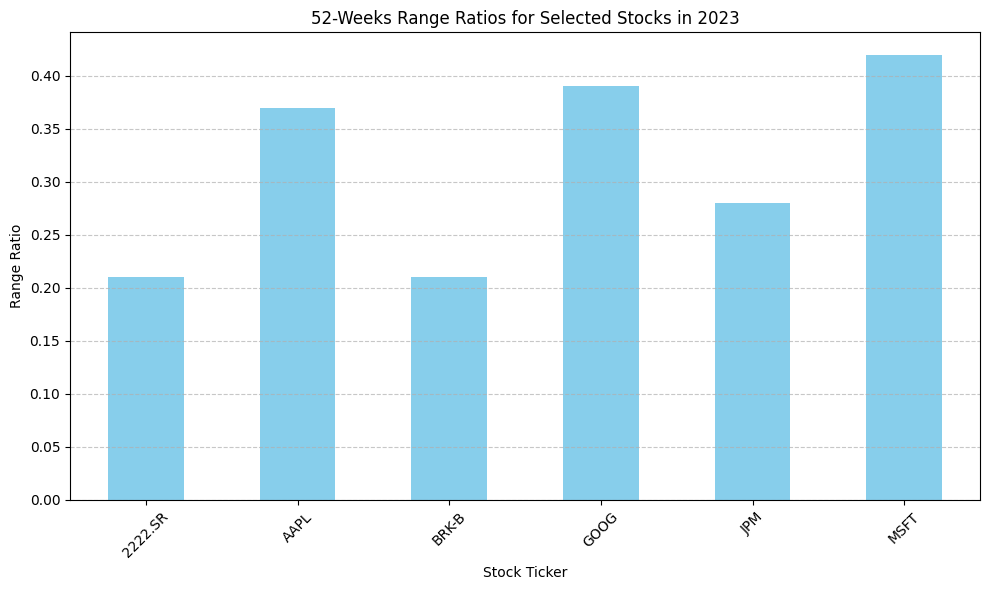

In [ ]:
# Plot Range Relation for every Stock
plt.figure(figsize=(10, 6))
range_ratios.plot(kind='bar', color='skyblue')
plt.title('52-Weeks Range Ratios for Selected Stocks in 2023')
plt.xlabel('Stock Ticker')
plt.ylabel('Range Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 5. Stock Dividend Yield

In [14]:
# Load dividend data for 2023
dividends_data = yf.download(tickers, start="2023-01-01", end="2023-12-31", progress=False, actions=True)

# Sum up dividends paid in 2023 per company
total_dividends = dividends_data['Dividends'].sum()

# Get the closing prices (Adj.Close) at the last trading day of the year
last_trading_day_prices = dividends_data.iloc[-1]['Adj Close']

# Calculate dividend yield for each company
dividend_yields = (total_dividends / last_trading_day_prices) * 100

# Find the maximum dividend yield
max_dividend_yield = dividend_yields.max()

# Round to 1 digit after the decimal point
max_dividend_yield_rounded = round(max_dividend_yield, 1)

print(f"The largest dividend yield for the same set of stocks in 2023 is {max_dividend_yield_rounded}%")

The largest dividend yield for the same set of stocks in 2023 is 2.4%


In [ ]:
# Retrieving and analyzing dividend data can be crucial for research purposes in financial analysis and modeling.
# Here are some reasons why this might be important:

# 1. Dividend Yield Evaluation: Dividend yield is a key metric for investors to assess the return on their investments in dividend-paying stocks.
# By analyzing dividend yield, investors can evaluate the attractiveness of a stock compared to other investment options.

# 2. Dividend Yield and Growth: Understanding a company's dividend yield and dividend growth can provide valuable insights into its financial stability, profitability, and growth prospects.
# Companies with a long history of continuous dividend payments and regular dividend growth could be attractive investment targets.

# 3. Dividend Policy Analysis: Analyzing a company's dividend policy can provide insights into its corporate strategy, financial health, and long-term growth prospects.
# Companies may follow different dividend policies, such as stable dividends, dividend increases, or variable dividend payments,


## 6. Investigate New Metrics

In [19]:
# Bitcoin
symbol = 'BTC-USD'

# Loading Data
data = yf.download(symbol, start='2023-01-01', end='2023-12-31', progress=False)

# Calculating Volatility
volatility = data['Close'].pct_change().std() * (252 ** 0.5)

print(f"Volatility for {symbol}: {volatility}")

# Trading Volume
volume = data['Volume']

print(f"Trading volume for {symbol}:")
print(volume)

# Monthly Trading Volume
monthly_volume = data['Volume'].resample('M').sum()

print(f"Monthly trading volume for {symbol}:")
print(monthly_volume)

Volatility for BTC-USD: 0.3646526183818212
Trading volume for BTC-USD:
Date
2023-01-01     9244361700
2023-01-02    12097775227
2023-01-03    13903079207
2023-01-04    18421743322
2023-01-05    13692758566
                 ...     
2023-12-26    30026850982
2023-12-27    25260941032
2023-12-28    22992093014
2023-12-29    26000021055
2023-12-30    16013925945
Name: Volume, Length: 364, dtype: int64
Monthly trading volume for BTC-USD:
Date
2023-01-31    690994018045
2023-02-28    723968574897
2023-03-31    883299703608
2023-04-30    511540319004
2023-05-31    443473015479
2023-06-30    481734214225
2023-07-31    382224489090
2023-08-31    437724169499
2023-09-30    337637313742
2023-10-31    476425634860
2023-11-30    570863267380
2023-12-31    705307411670
Freq: M, Name: Volume, dtype: int64


In [24]:
# Correlation Bitcoin and SP500
btc_symbol = 'BTC-USD'
sp500_symbol = '^GSPC'

# Loading Data
btc_data = yf.download(btc_symbol, start='2020-01-01', end='2023-12-31', progress=False)['Adj Close']
sp500_data = yf.download(sp500_symbol, start='2020-01-01', end='2023-12-31', progress=False)['Adj Close']

# Creating Data Frame
data = pd.concat([btc_data, sp500_data], axis=1)
data.columns = ['BTC', 'S&P 500']

# Calculating Correlation
correlation = data.corr().iloc[0, 1]

print(f"Correlation between Bitcoin and S&P 500 Index: {correlation}")

Correlation between Bitcoin and S&P 500 Index: 0.7689644290290191


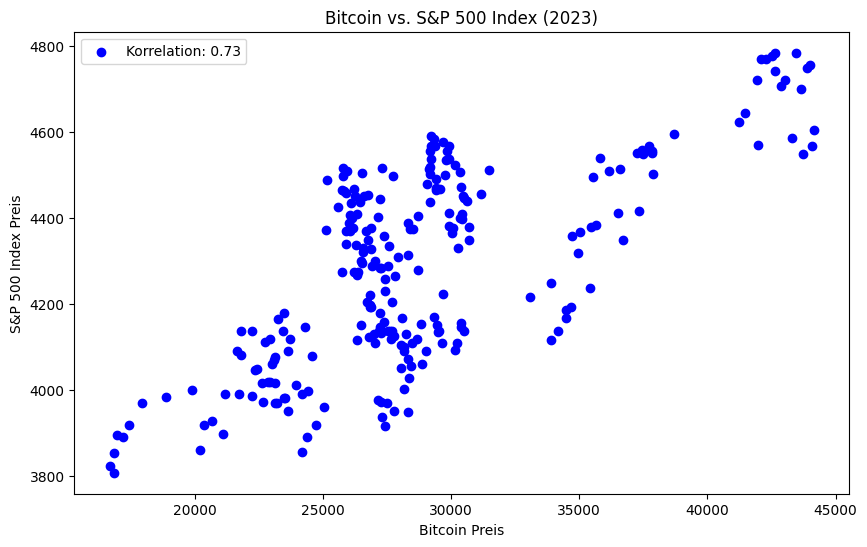

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Pearson Correlation
btc_symbol = 'BTC-USD'
sp500_symbol = '^GSPC'

# Loading Data
btc_data = yf.download(btc_symbol, start='2023-01-01', end='2023-12-31', progress= False)['Adj Close']
sp500_data = yf.download(sp500_symbol, start='2023-01-01', end='2023-12-31', progress = False)['Adj Close']

# Synchronising Data for same Length
btc_data = btc_data.loc[sp500_data.index]
sp500_data = sp500_data.loc[btc_data.index]

# Calculating Pearson-Korrelation
corr, _ = pearsonr(btc_data, sp500_data)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(btc_data, sp500_data, color='blue', label=f'Korrelation: {corr:.2f}')
plt.title('Bitcoin vs. S&P 500 Index (2023)')
plt.xlabel('Bitcoin Preis')
plt.ylabel('S&P 500 Index Preis')
plt.legend()

plt.show()


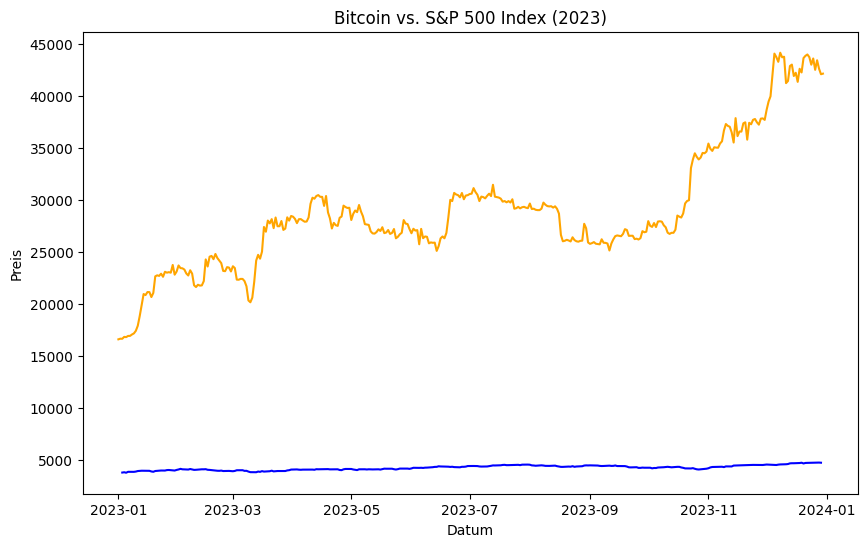

In [34]:
# Plotting for Year 2023
btc_symbol = 'BTC-USD'
sp500_symbol = '^GSPC'

# Data
btc_data = yf.download(btc_symbol, start='2023-01-01', end='2023-12-31', progress=False)['Adj Close']
sp500_data = yf.download(sp500_symbol, start='2023-01-01', end='2023-12-31', progress=False)['Adj Close']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(btc_data, label='Bitcoin', color='orange')
plt.plot(sp500_data, label='S&P 500', color='blue')

# Heading
plt.title('Bitcoin vs. S&P 500 Index (2023)')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend().remove()


## 7. Time-driven strategy description around earnings releases

In [35]:
# Time Driven Strategy for Bitcoin

# 1: Data Collection
# Gather information about future events or developments related to Bitcoin from sources like CoinMarketCap or CoinGecko.

# Step 2: Comparison with Past Data
# Compare upcoming events with historical data to identify patterns and trends in Bitcoin price and trading volume reactions.

# Step 3: Criteria Establishment
# Define criteria such as the potential impact of the event on Bitcoin price, its significance to the cryptocurrency industry, and expected market reactions.

# Step 4: Sentiment Analysis
# Conduct sentiment analysis to gauge community sentiment, news sentiment, and social media discussions surrounding each event.

# Step 5: Risk Assessment
# Evaluate the risk associated with each event based on factors like Bitcoin price volatility, market liquidity, and potential industry-wide impacts.

# Based on these steps, select Bitcoin-related events that are relevant for further analysis, trading strategies, or investment decisions.


In [ ]:
# Analytical Strategy for Stocks

# Data Collection: Utilize the Yahoo Finance Earnings Calendar to gather earnings dates for the entire month of April, focusing on upcoming weeks.
# Comparison with Previous Data: Compare the upcoming earnings data with previously closed earnings to identify patterns and trends. Pay particular attention to deviations between expected and actual earnings.
# Criteria Establishment: Based on various criteria such as company size, industry, historical revenue growth, volatility, and other financial metrics, establish filters to select a subset of companies of interest.
# Sentiment Analysis: Evaluate the sentiment surrounding each company and its upcoming earnings using sentiment analysis techniques. This could involve analyzing news articles, social media, analyst reports, and other relevant sources.
# Risk Assessment: Assess the risk for each company by considering factors such as historical price volatility, market capitalization, beta value, and other financial metrics.

# Based on these steps, I would select a subset of companies that are relevant for further analysis or trading strategies. I would ensure that my selection aligns with the specific goals and criteria of my analysis or strategy.
